In [72]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

os.chdir('C:/Users/christian fink/Math485/Math485_2/')
data = pd.read_csv('CAR TICKET RATES.csv')

In [73]:
data

,CAR COLOR,PERCENT COLOR,PULLOVER RATE
0,White,23.9,9
1,Black,23.2,20
2,Silver,14.5,12
3,Gray,15.5,13
4,Blue,9.0,11
5,Red,10.3,15
6,Green,0.7,6
7,Brown,1.4,7
8,Beige,0.4,4
9,Other,1.1,3


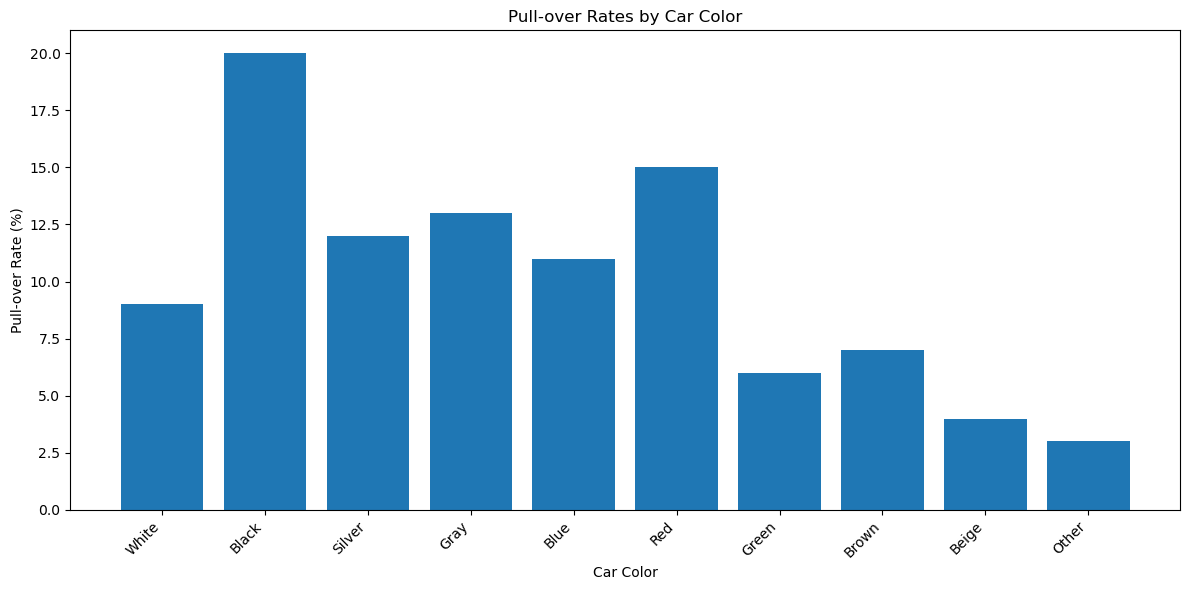

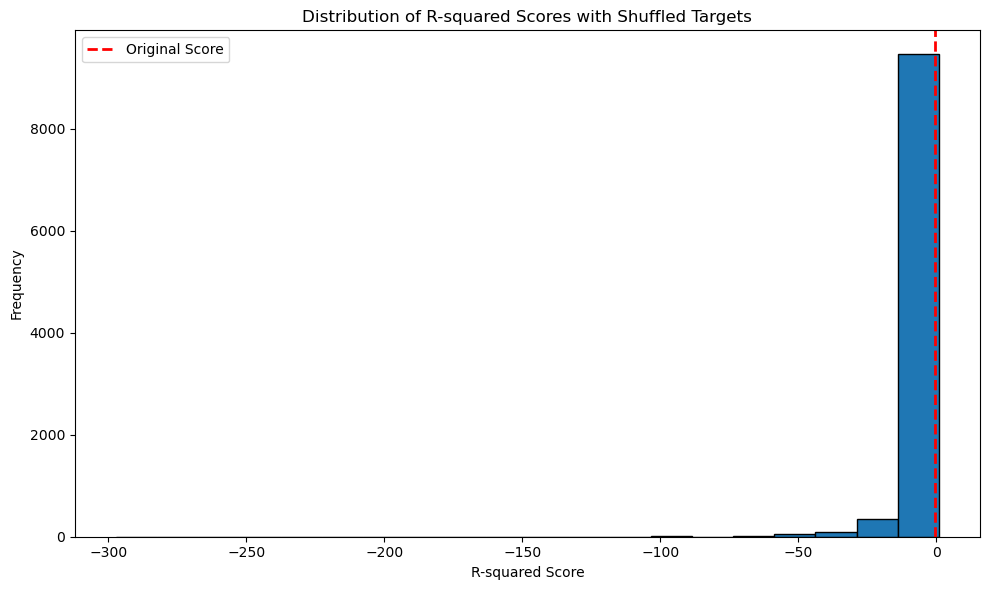

Original R_Squared: -0.5575339878975722
P-value: 0.4103
Correlation might be due to chance.


In [74]:
def target_shuffle(X, y, iterations=10000):
    X_scaled = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)
    model = LinearRegression()
    model.fit(X_train, y_train)
    original_score = model.score(X_test, y_test)

    shuffled_scores = []
    for _ in range(iterations):
        y_shuffled = np.random.permutation(y)
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_shuffled, test_size=0.3)
        shuf_model = LinearRegression()
        shuf_model.fit(X_train, y_train)
        shuffled_scores.append(shuf_model.score(X_test, y_test))

    p_value = np.mean(np.array(shuffled_scores) >= original_score)

    plt.figure(figsize=(12, 6))
    plt.bar(data['CAR COLOR'], data['PULLOVER RATE'])
    plt.title('Pull-over Rates by Car Color')
    plt.xlabel('Car Color')
    plt.ylabel('Pull-over Rate (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.hist(shuffled_scores, bins=20, edgecolor='black')
    plt.title('Distribution of R-squared Scores with Shuffled Targets')
    plt.xlabel('R-squared Score')
    plt.ylabel('Frequency')
    plt.axvline(original_score, color='red', linestyle='dashed', linewidth=2, label='Original Score')
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"Original R_Squared: {original_score}")
    print(f"P-value: {p_value}")

    alpha = 0.05
    if p_value < alpha:
        print("Correlation is statistically significant.")
    else:
        print("Correlation might be due to chance.")

X = data[['PERCENT COLOR']]
y = data['PULLOVER RATE']
target_shuffle(X, y)